## Summary of EDA

- The data is imbalanced. Our target variable y has 36548 no classification and only 4640 yes variables. We might need to conduct SMOTE upsampling or downsampling to deal with that. 

- There are also outliers in many of our variables. Therefore, when we prepare our data for the model, we might want to remove some outliers. 

- There are no missing values in numerical data. However, there are many unknown values in the categorical variables. Since there are no missing numerical features, we have reason to believe that 'unknown' might provide some information for our model. Therefore, instead of treating it as a missing value and remove/replace them, we would keep it as is for now. 

- The features are either categorical or numeric. For EDA, we treated them separately and used different plots and tables to understand these data.

## Import packages

In [8]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

## Read data 

In [9]:
df = pd.read_csv('BankMarketingAdditional-1.csv', sep=';')

In [10]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [38]:
df.shape

(41188, 21)

In [40]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [43]:
df.nunique()

age                 78
job                 12
marital              4
education            8
default              3
housing              3
loan                 3
contact              2
month               10
day_of_week          5
duration          1544
campaign            42
pdays               27
previous             8
poutcome             3
emp.var.rate        10
cons.price.idx      26
cons.conf.idx       26
euribor3m          316
nr.employed         11
y                    2
dtype: int64

In [11]:
df.y.value_counts()

no     36548
yes     4640
Name: y, dtype: int64

## EDA

### for numeric data

In [7]:
numeric_columns = df.dtypes[df.dtypes == 'int64'].index | df.dtypes[df.dtypes == 'float64'].index
numeric_columns

Index(['age', 'campaign', 'cons.conf.idx', 'cons.price.idx', 'duration',
       'emp.var.rate', 'euribor3m', 'nr.employed', 'pdays', 'previous'],
      dtype='object')

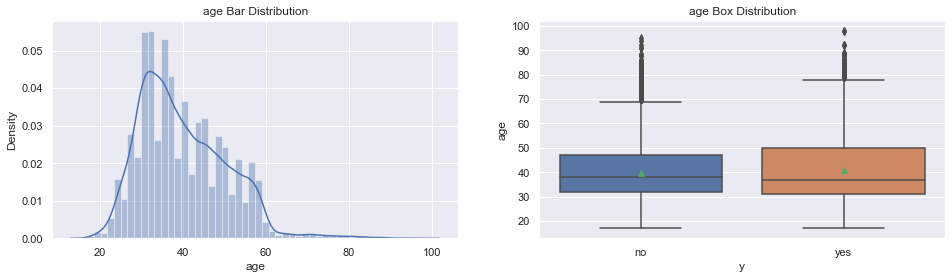

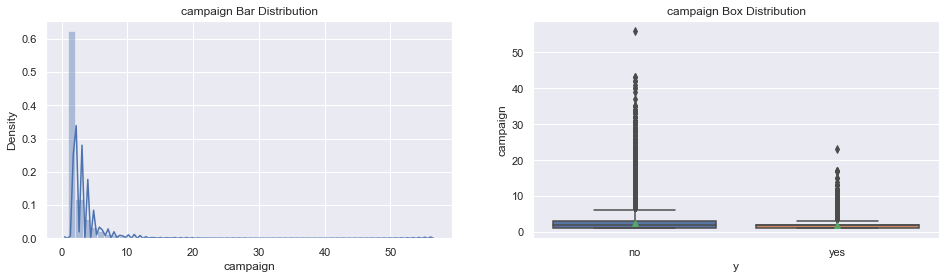

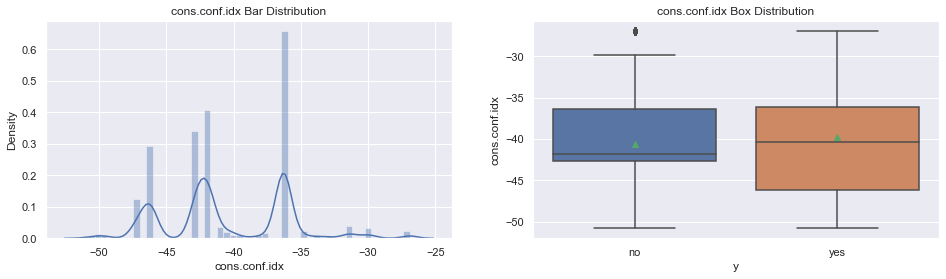

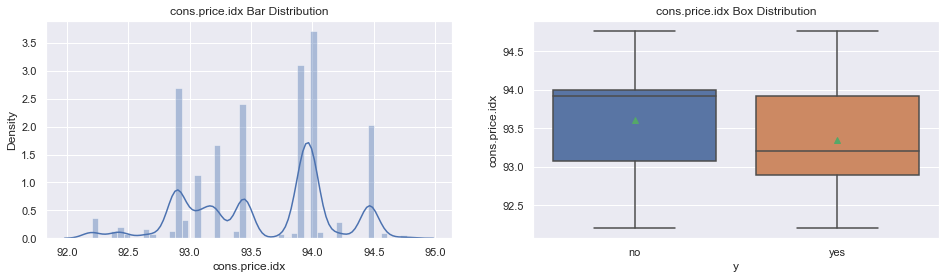

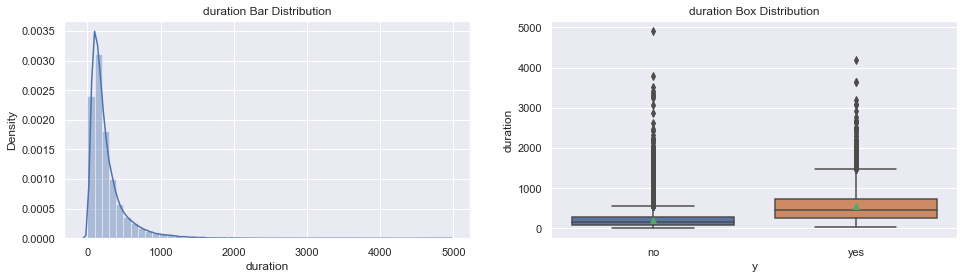

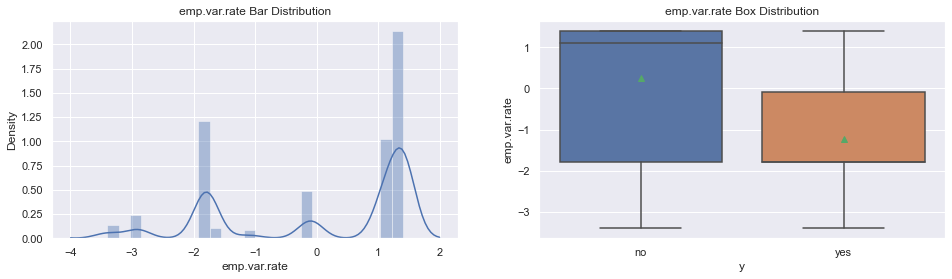

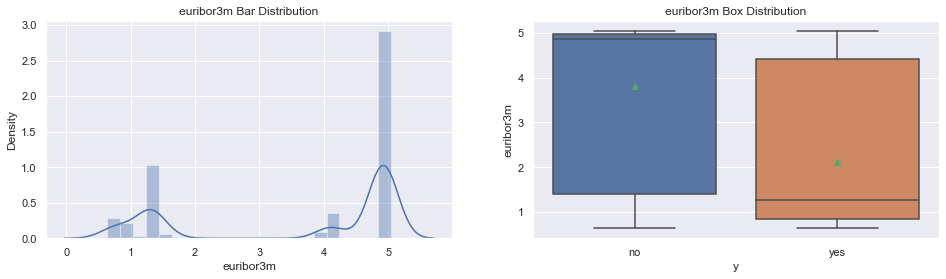

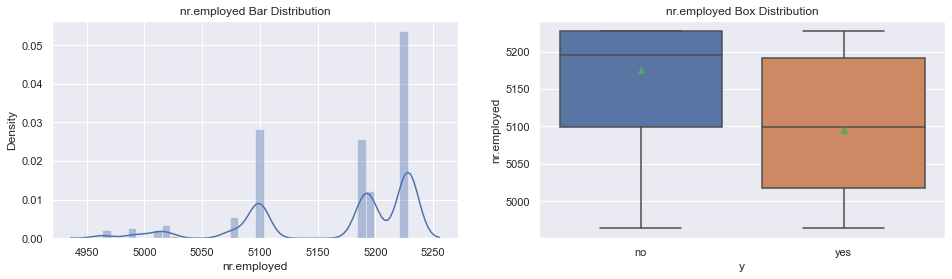

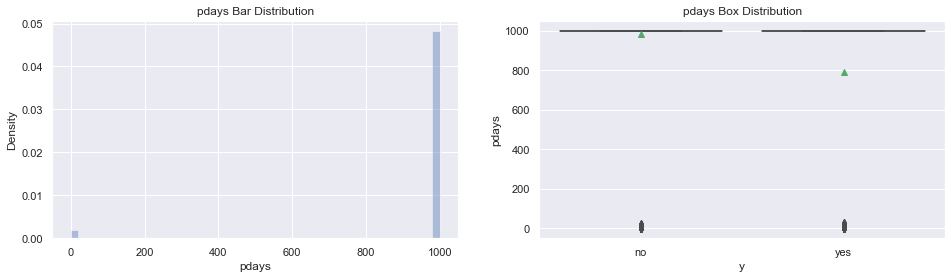

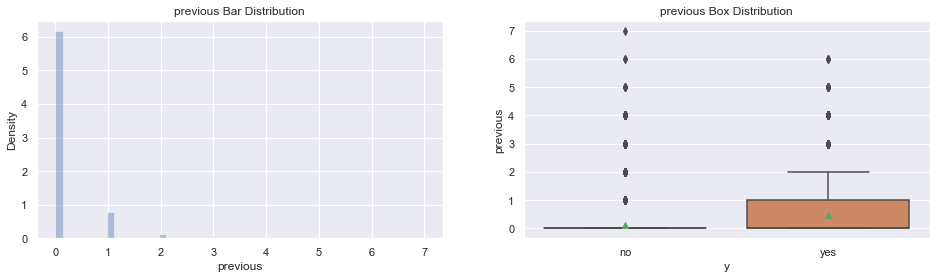

In [45]:
# add bar&box plot for each numeric variable 
for column in numeric_columns:
    # set the figure size 
    plt.figure(figsize=(16,4))
    
    # draw the bar chart
    plt.subplot(1,2,1)
    sns.distplot(df[column])
    plt.xlabel(column)
    plt.ylabel('Density')
    plt.title(f'{column} Bar Distribution')
    
    # draw the box chart, group by "y"
    plt.subplot(1,2,2)
    sns.boxplot(x='y', y=column, data =df, showmeans=True )
    plt.xlabel('y')
    plt.ylabel(column)
    plt.title(f'{column} Box Distribution')

    plt.show()
    print()

### for categorical data

In [46]:
obj = df.select_dtypes(include=['object'])
# use the for loop to count how many different type in each variable of the categorical data
for i in obj.columns:
    print ("---- %s ---" % i)
    print (pd.Series(obj[i]).value_counts())
    print ('\n')

---- job ---
admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: job, dtype: int64


---- marital ---
married     24928
single      11568
divorced     4612
unknown        80
Name: marital, dtype: int64


---- education ---
university.degree      12168
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
unknown                 1731
illiterate                18
Name: education, dtype: int64


---- default ---
no         32588
unknown     8597
yes            3
Name: default, dtype: int64


---- housing ---
yes        21576
no         18622
unknown      990
Name: housing, dtype: int64


---- loan ---
no         33950
yes         6248
unknown      990
Name: loan, dtype: int

In [47]:
obj_column = df.dtypes[df.dtypes == 'object'].index

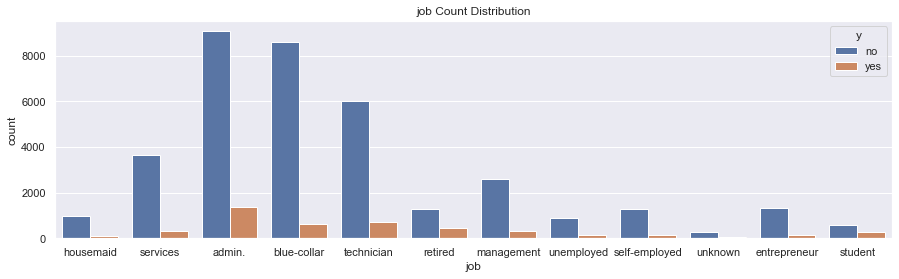

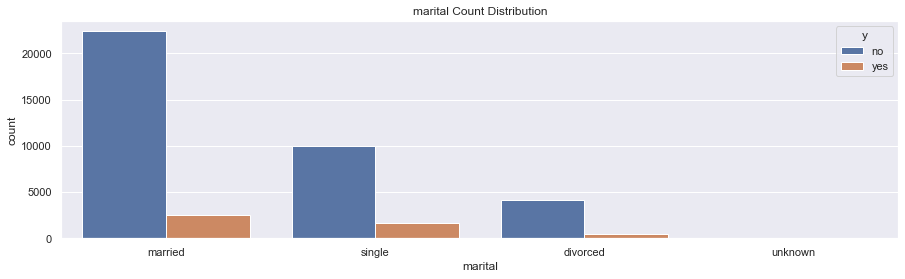

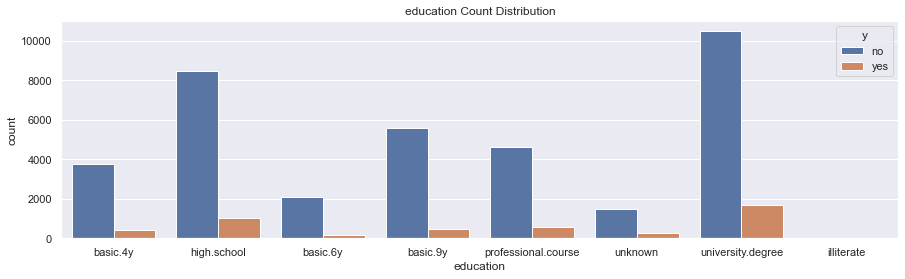

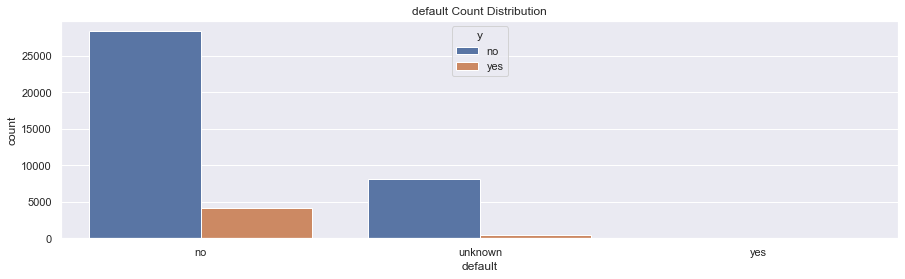

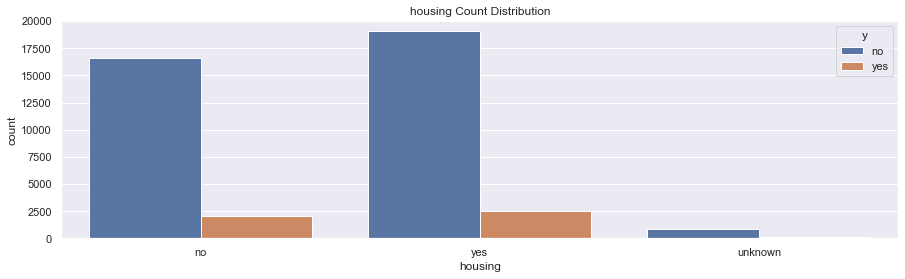

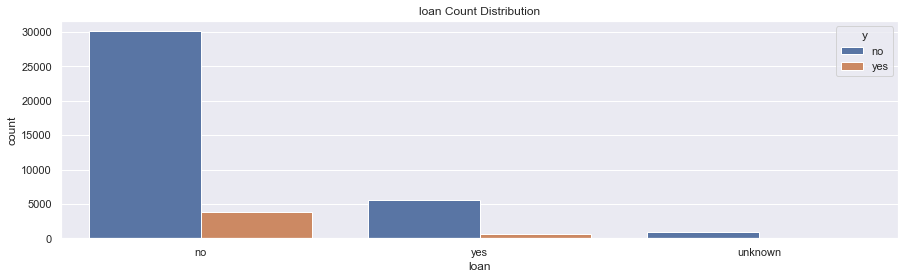

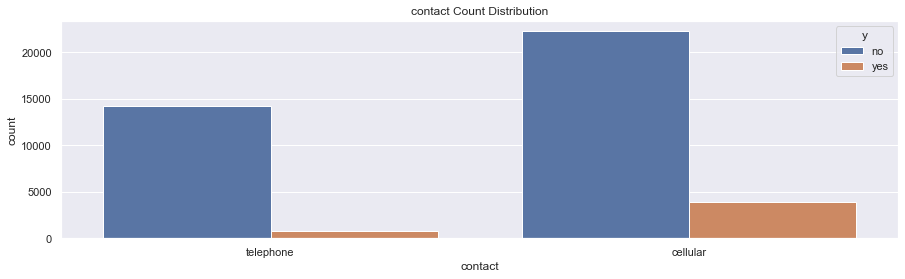

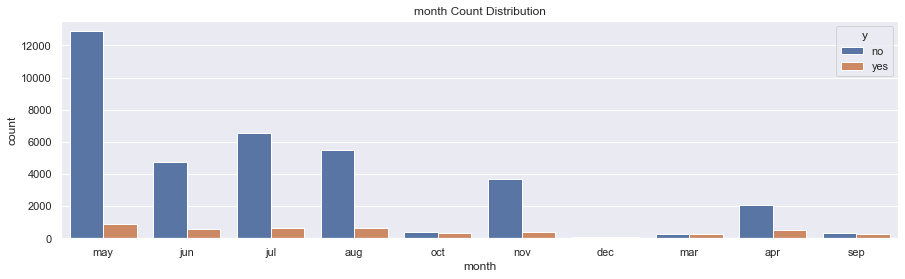

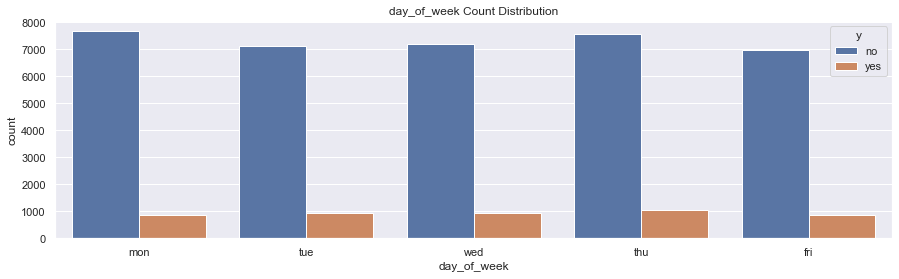

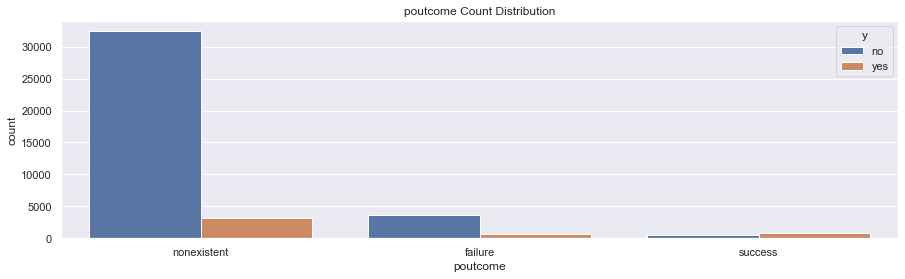

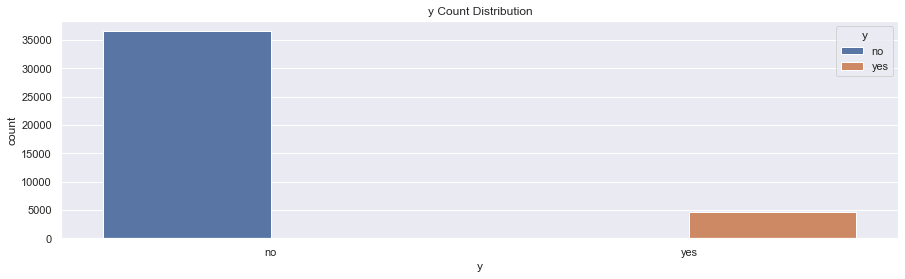

In [48]:
# add bar plot for each categorical variable, group by "y"
for i in range(0, len(obj_columns)) :
    # set the plot size
    fig, ax = plt.subplots(figsize=(15,4))
    
    # use the countplot to group "y"
    sns.countplot(x = obj_column[i], hue='y', data = df)

    ax.set_title('{} Count Distribution'.format(obj_column[i]))

In [49]:
group = df.groupby('y')
# percentage function: calculate the percentage each category represent for both "yes" and "no"
def percentage(feature,groupby='yes'):

    count = group.get_group(groupby)[feature].value_counts()
    total_count = df[feature].value_counts()[count.index]

    perc = (count/total_count)*100
    return perc 

In [50]:
# plot_barh function: set the format for the bar plot
def plot_barh(array,incrementer, bias, text_color ='red'):

    plt.barh(array.index, width = array.values, height = .5)
    plt.yticks(np.arange(len(array)))
    plt.xticks(range(0, round(max(array)) + bias, incrementer ))

    for index, value in enumerate(array.values):
        plt.text(value +.5, index, s= '{:.1f}%'.format(value), color = text_color)

    return plt

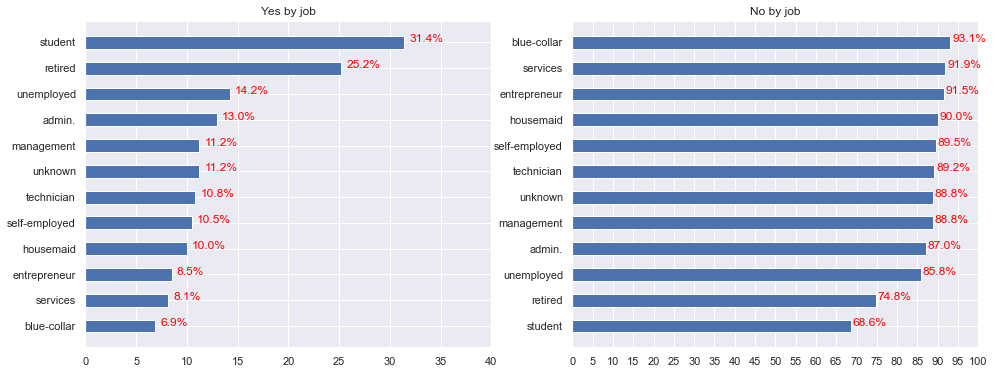

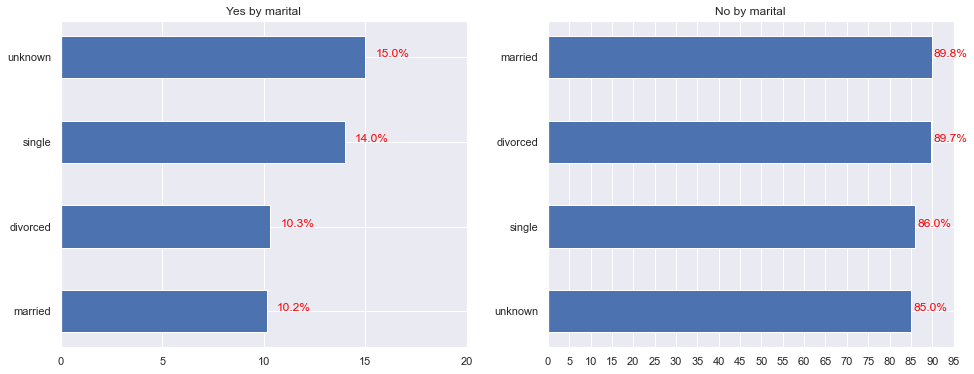

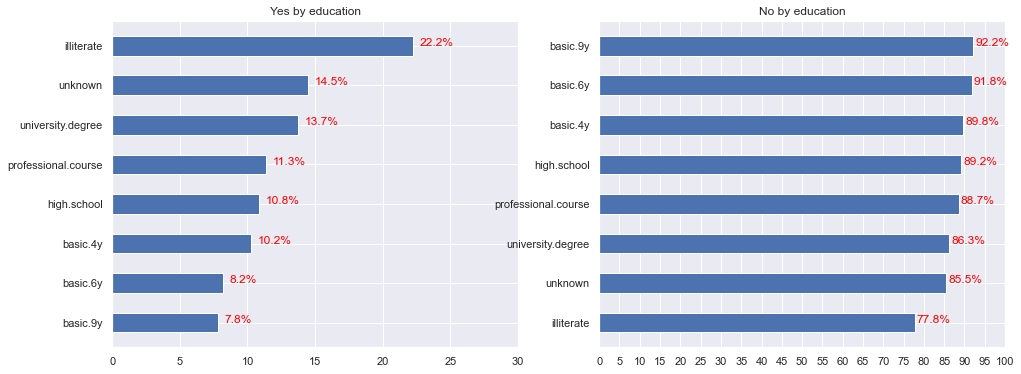

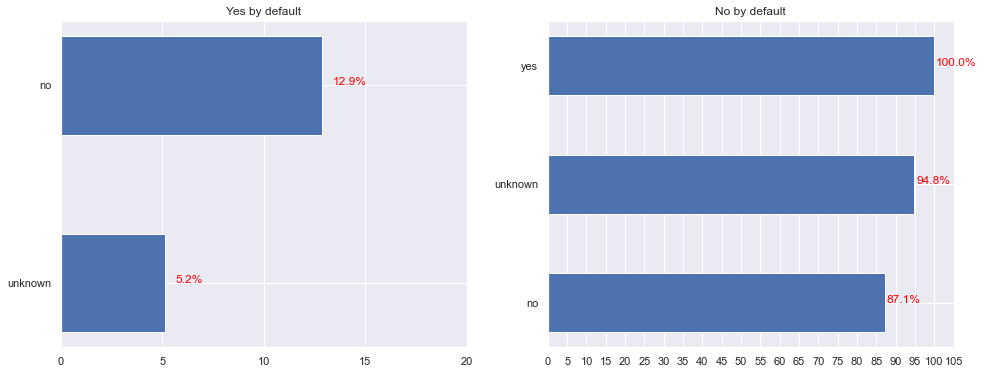

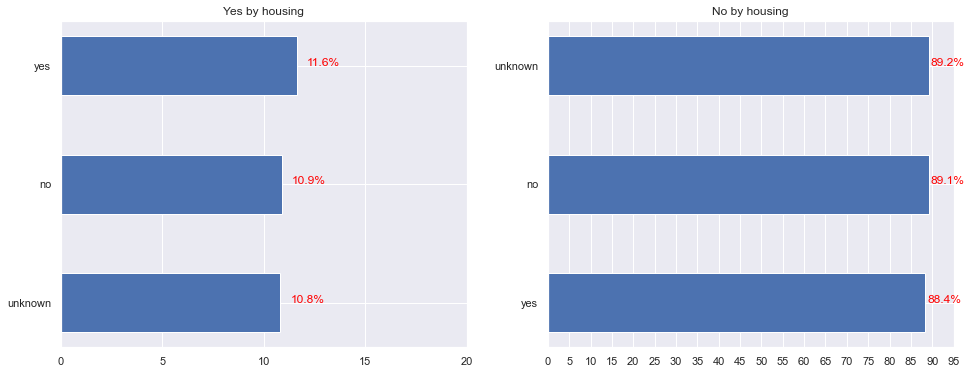

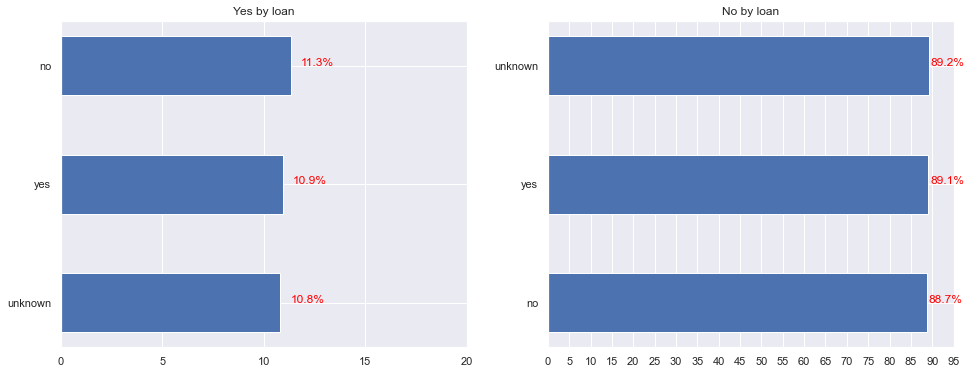

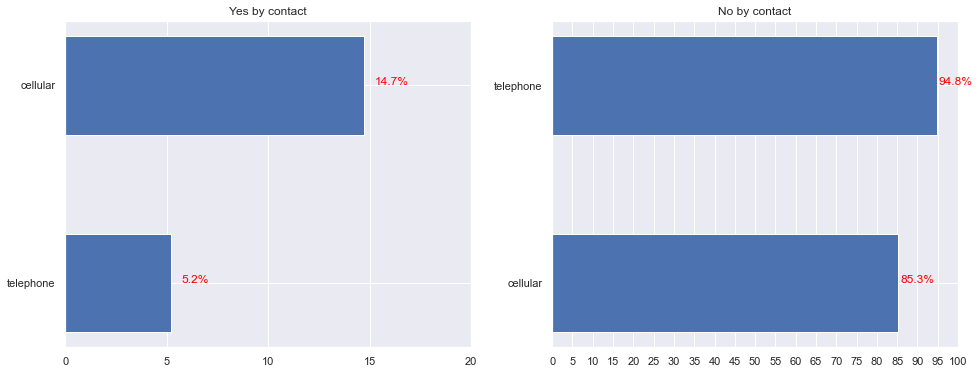

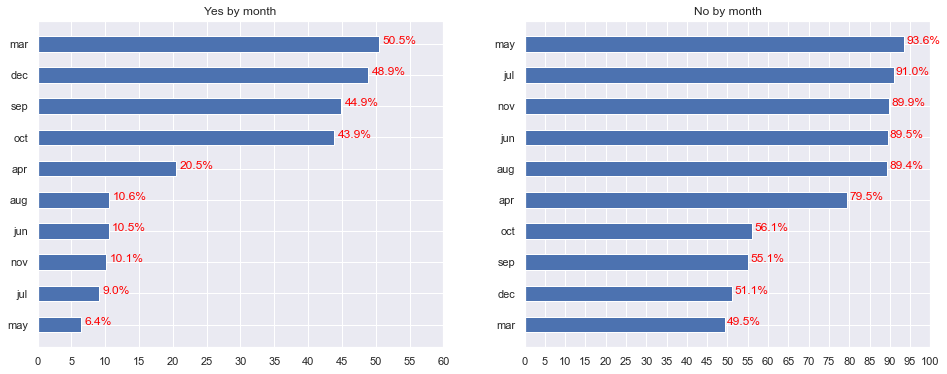

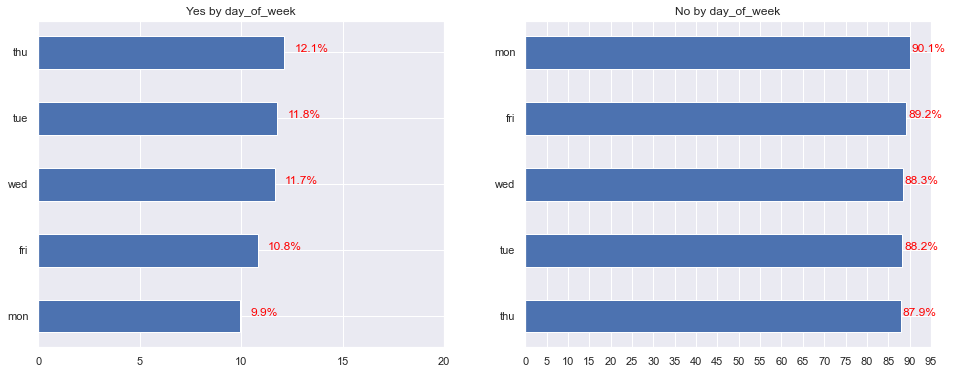

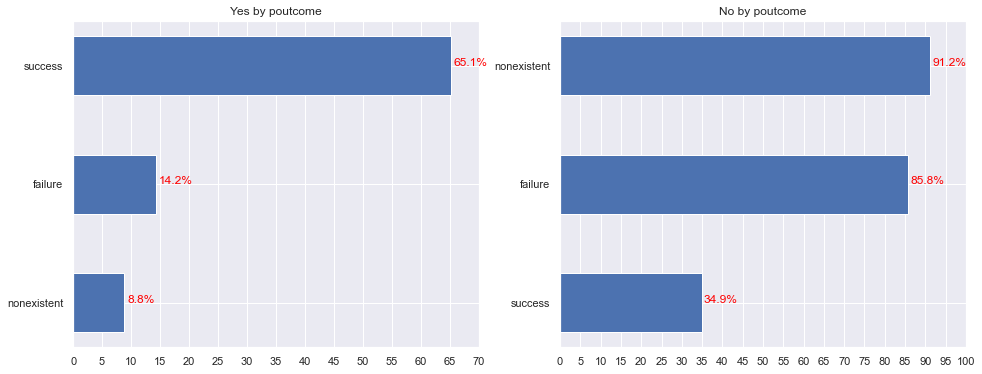

In [51]:
# plot and rank the percentage each category reprsents for both "yes" and "no"
for column in obj_columns[:-1]:

    yes_perc = percentage(column, groupby='yes')
    no_perc = percentage(column, groupby='no')

    plt.figure(figsize=(16,6))

    plt.subplot(1,2,1)
    plt.title(f'Yes by {column}')
    plot_barh(yes_perc.sort_values(),5,10)

    plt.subplot(1,2,2)
    plt.title(f'No by {column}')
    plot_barh(no_perc.sort_values(),5,10)
    plt.show()
    print()